In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Step 1: Load the datasets
# Assuming the datasets are in txt format with tab-separated values
#train_data = pd.read_csv('train_data.txt', sep='\t')
#test_data = pd.read_csv('test_data.txt', sep='\t')

train_path= "train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [5]:
# Step 2: Inspect the data
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [7]:
test_path= "test_data.txt"
test_data = pd.read_csv(train_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

In [9]:
test_data

,ID,TITLE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [13]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [15]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  object
 1   TITLE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [19]:
test_data.describe()

,ID,TITLE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [21]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

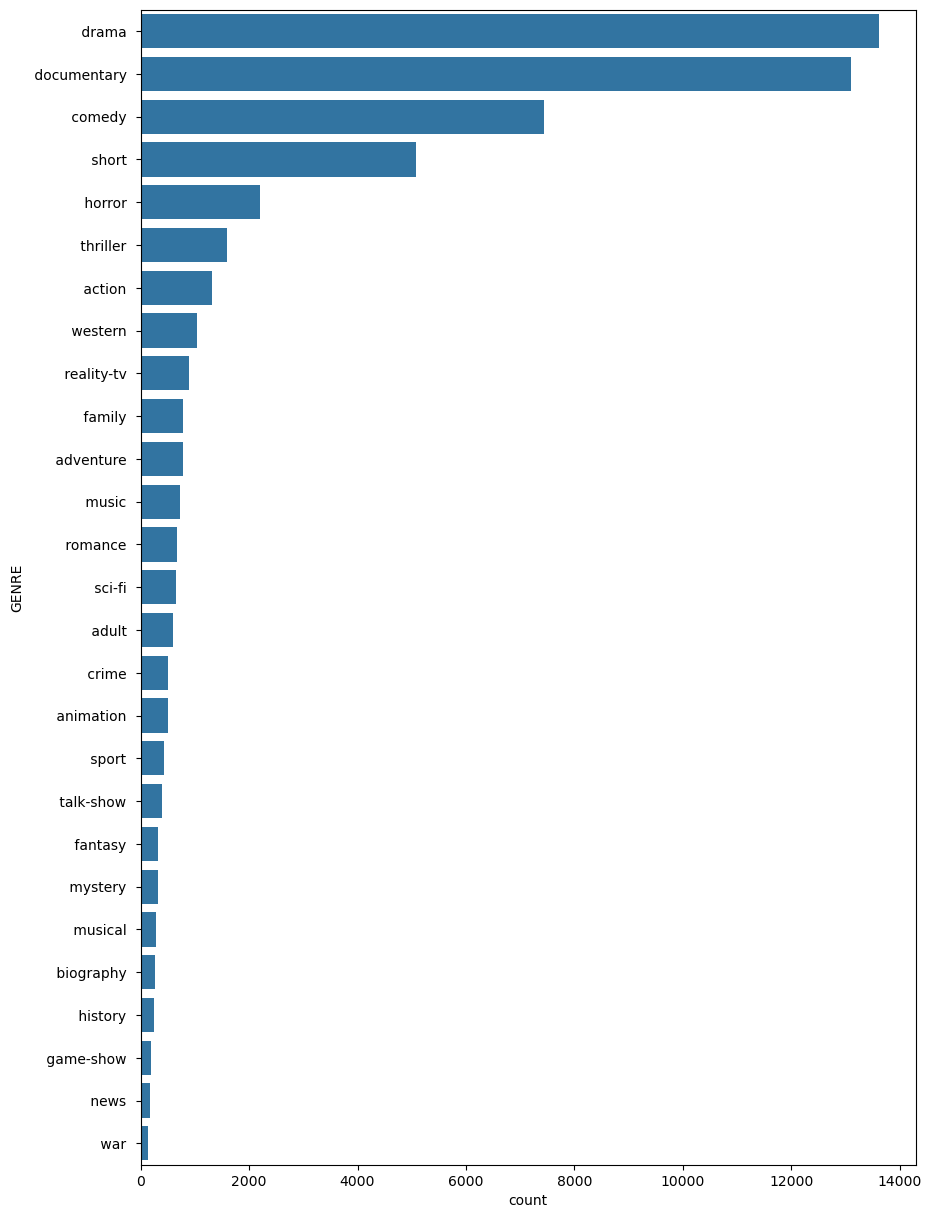

In [25]:
#EDA
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_7676\3096700157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")


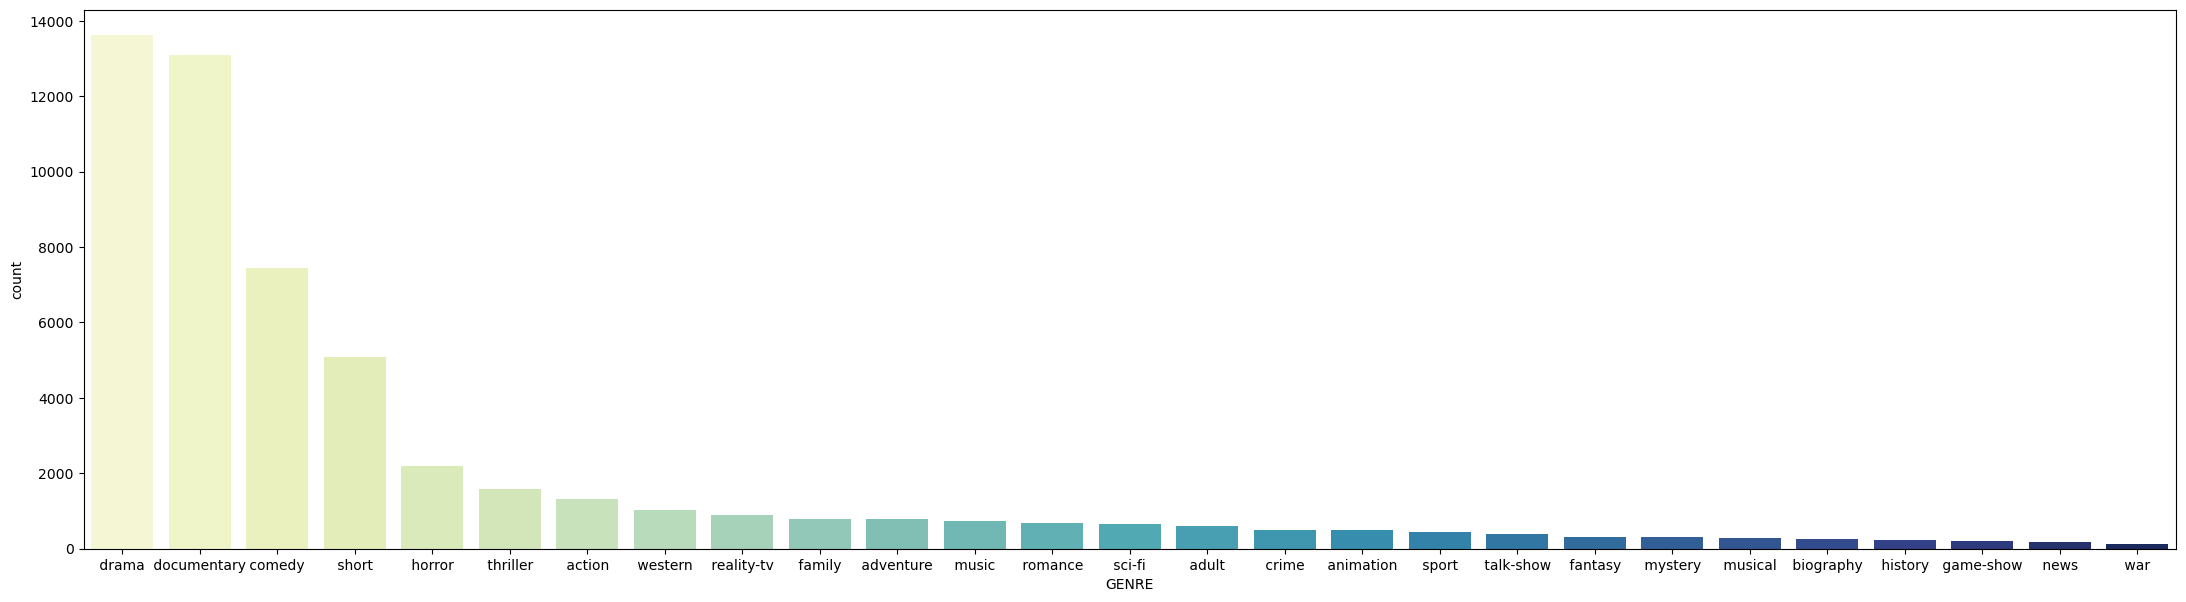

In [27]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")
plt.show()

In [29]:
# Step 3: Text Preprocessing function
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [31]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stop words
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [33]:
# Apply preprocessing to training and test datasets
train_data['Cleaned_Description'] = train_data['DESCRIPTION'].apply(preprocess_text)
test_data['Cleaned_Description'] = test_data['DESCRIPTION'].apply(preprocess_text)

In [35]:
# Step 4: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Using the top 5000 words


In [37]:
train_data

,TITLE,GENRE,DESCRIPTION,Cleaned_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered bodies ground z...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt stand comedy growing facing fe...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [39]:
# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(train_data['Cleaned_Description'])


In [43]:
# Only transform the test data (no fit here to avoid data leakage)
X_test_tfidf = tfidf.transform(test_data['Cleaned_Description'])

In [44]:
# Step 5: Model training
y_train = train_data['GENRE']

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

In [ ]:
# Alternative: You can also use Naive Bayes if preferred
# model = MultinomialNB()
# model.fit(X_train_tfidf, y_train)

In [ ]:
# Step 6: Predictions on the test set
test_predictions = model.predict(X_test_tfidf)

In [ ]:
# Since the test dataset does not have true labels, we only show predictions
test_data['Predicted_Genre'] = test_predictions

In [ ]:
# Save the test predictions
test_data[['ID','TITLE','Predicted_Genre']].to_csv('predicted_genres.csv', index=False)


In [ ]:
Prediction = pd.read_csv('predicted_genres.csv')